# 01__diff_expr
by Winona

notebook to run edgeR pipeline to find diff expr genes between hESCs and mESCs. DEseq2 is used to quantify tpms

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

In [2]:
options(install.packages.compile.from.source="interactive")

In [3]:
# BiocManager::install("GenomicRanges")

In [4]:
# BiocManager::install("DESeq2")

In [5]:
suppressMessages(library("DESeq2"))

## 1. load data

In [6]:
human_cts <- read.csv("../../../data/03__rna_seq/00__HUES64/01__featurecounts/hESC_all.counts.txt", sep="\t", row.names="gene_id")
human_cts <- as.matrix(human_cts)
head(human_cts)

,rep1,rep2,rep3
ENSG00000223972,0,0,0
ENSG00000227232,351,409,318
ENSG00000243485,0,0,1
ENSG00000237613,0,0,0
ENSG00000268020,0,0,0
ENSG00000240361,0,0,0


In [7]:
mouse_cts <- read.csv("../../../data/03__rna_seq/01__mESC/01__featurecounts/mESC_all.counts.txt", sep="\t", row.names="gene_id")
mouse_cts <- as.matrix(mouse_cts)
head(mouse_cts)

,rep1,rep2,rep3
ENSMUSG00000000702,0,0,0
ENSMUSG00000078423,0,0,0
ENSMUSG00000078424,0,0,0
ENSMUSG00000071964,2,0,0
ENSMUSG00000093774,0,0,5
ENSMUSG00000093444,0,0,0


In [8]:
human_cols <- read.csv("../../../data/03__rna_seq/00__HUES64/01__featurecounts/hESC_all.cols.txt", sep="\t", row.names="column")
head(human_cols)

,condition
rep1,rep1
rep2,rep2
rep3,rep3


In [9]:
mouse_cols <- read.csv("../../../data/03__rna_seq/01__mESC/01__featurecounts/mESC_all.cols.txt", sep="\t", row.names="column")
head(mouse_cols)

,condition
rep1,rep1
rep2,rep2
rep3,rep3


In [10]:
orth_cts <- read.csv("../../../data/03__rna_seq/02__orths/01__featurecounts/orths.counts.txt", sep="\t", row.names="orth_id")
orth_cts <- as.matrix(orth_cts)
head(orth_cts)

,hESC_rep1,hESC_rep2,hESC_rep3,mESC_rep1,mESC_rep2,mESC_rep3
ENSG00000187961__ENSMUSG00000078485,660,696,463,92,50,100
ENSG00000187642__ENSMUSG00000078486,9,19,19,10,3,11
ENSG00000187608__ENSMUSG00000035692,1444,1027,749,294,69,65
ENSG00000188157__ENSMUSG00000041936,8942,11535,9946,7173,5355,6431
ENSG00000131591__ENSMUSG00000059939,470,520,456,853,703,1027
ENSG00000207730__ENSMUSG00000065549,0,1,0,0,0,0


In [11]:
orth_cols <- read.csv("../../../data/03__rna_seq/02__orths/01__featurecounts/orths.cols.txt", sep="\t", row.names="column")
head(orth_cols)

,condition,sample
hESC_rep1,hESC,sample1
hESC_rep2,hESC,sample2
hESC_rep3,hESC,sample3
mESC_rep1,mESC,sample1
mESC_rep2,mESC,sample2
mESC_rep3,mESC,sample3


In [12]:
orth_cols_new <- read.csv("../../../data/03__rna_seq/02__orths/01__featurecounts/orths.cols.voom.samples.txt", sep="\t", row.names="column")
head(orth_cols_new)

,condition,sample,treatment
hESC_rep1,hESC,h1,T
hESC_rep1.UT,hESC,h1,UT
hESC_rep2,hESC,h2,T
hESC_rep2.UT,hESC,h2,UT
hESC_rep3,hESC,h3,T
hESC_rep3.UT,hESC,h3,UT


## 1. first approach -- only use transfected samples, simple DE analysis

In [13]:
dds <- DESeqDataSetFromMatrix(countData = human_cts,
                              colData = human_cols,
                              design = ~ condition)

In [14]:
dds <- estimateSizeFactors(dds)

In [15]:
human_counts <- counts(dds, normalized=TRUE)
head(human_counts)

,rep1,rep2,rep3
ENSG00000223972,0.0000,0.0000,0.0000000
ENSG00000227232,353.5704,427.6608,297.0468699
ENSG00000243485,0.0000,0.0000,0.9341097
ENSG00000237613,0.0000,0.0000,0.0000000
ENSG00000268020,0.0000,0.0000,0.0000000
ENSG00000240361,0.0000,0.0000,0.0000000


In [16]:
dds <- DESeqDataSetFromMatrix(countData = mouse_cts,
                              colData = mouse_cols,
                              design = ~ condition )

In [17]:
dds <- estimateSizeFactors(dds)

In [18]:
mouse_counts <- counts(dds, normalized=TRUE)
head(mouse_counts)

,rep1,rep2,rep3
ENSMUSG00000000702,0.000000,0,0.000000
ENSMUSG00000078423,0.000000,0,0.000000
ENSMUSG00000078424,0.000000,0,0.000000
ENSMUSG00000071964,2.119803,0,0.000000
ENSMUSG00000093774,0.000000,0,4.487581
ENSMUSG00000093444,0.000000,0,0.000000


In [19]:
dds <- DESeqDataSetFromMatrix(countData = orth_cts,
                              colData = orth_cols,
                              design = ~ condition)
dds$condition <- factor(dds$condition, levels = c("mESC","hESC"))
dds

class: DESeqDataSet 
dim: 18898 6 
metadata(1): version
assays(1): counts
rownames(18898): ENSG00000187961__ENSMUSG00000078485
  ENSG00000187642__ENSMUSG00000078486 ...
  ENSG00000198695__ENSMUSG00000064368
  ENSG00000198727__ENSMUSG00000064370
rowData names(0):
colnames(6): hESC_rep1 hESC_rep2 ... mESC_rep2 mESC_rep3
colData names(2): condition sample

In [20]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [21]:
res <- results(dds)
head(res)

log2 fold change (MLE): condition hESC vs mESC 
Wald test p-value: condition hESC vs mESC 
DataFrame with 6 rows and 6 columns
                                             baseMean     log2FoldChange
                                            <numeric>          <numeric>
ENSG00000187961__ENSMUSG00000078485  248.865916977641   1.44788989205641
ENSG00000187642__ENSMUSG00000078486  11.1885272071858 -0.519509815036311
ENSG00000187608__ENSMUSG00000035692  445.084705291018   1.38544039223913
ENSG00000188157__ENSMUSG00000041936   8291.9583179643 -0.809395067656551
ENSG00000131591__ENSMUSG00000059939  855.740893299457    -2.315953843017
ENSG00000207730__ENSMUSG00000065549 0.109121183700762 -0.539572243296155
                                                lfcSE               stat
                                            <numeric>          <numeric>
ENSG00000187961__ENSMUSG00000078485 0.333795947359398   4.33764970339039
ENSG00000187642__ENSMUSG00000078486 0.711960312458307   -0.72968929018

In [22]:
counts <- counts(dds, normalized=TRUE)
head(counts)

,hESC_rep1,hESC_rep2,hESC_rep3,mESC_rep1,mESC_rep2,mESC_rep3
ENSG00000187961__ENSMUSG00000078485,399.234542,455.6900631,238.068316,163.46752,86.62733,150.10773
ENSG00000187642__ENSMUSG00000078486,5.444107,12.4398149,9.769542,17.76821,5.19764,16.51185
ENSG00000187608__ENSMUSG00000035692,873.476786,672.4047340,385.125634,522.38534,119.54572,97.57002
ENSG00000188157__ENSMUSG00000041936,5409.023143,7552.2771239,5114.098201,12745.13611,9277.78731,9653.42803
ENSG00000131591__ENSMUSG00000059939,284.303386,340.4580931,234.469011,1515.62820,1217.98029,1541.60637
ENSG00000207730__ENSMUSG00000065549,0.000000,0.6547271,0.000000,0.00000,0.00000,0.00000


In [23]:
counts <- counts(dds, normalized=TRUE)
head(counts)

,hESC_rep1,hESC_rep2,hESC_rep3,mESC_rep1,mESC_rep2,mESC_rep3
ENSG00000187961__ENSMUSG00000078485,399.234542,455.6900631,238.068316,163.46752,86.62733,150.10773
ENSG00000187642__ENSMUSG00000078486,5.444107,12.4398149,9.769542,17.76821,5.19764,16.51185
ENSG00000187608__ENSMUSG00000035692,873.476786,672.4047340,385.125634,522.38534,119.54572,97.57002
ENSG00000188157__ENSMUSG00000041936,5409.023143,7552.2771239,5114.098201,12745.13611,9277.78731,9653.42803
ENSG00000131591__ENSMUSG00000059939,284.303386,340.4580931,234.469011,1515.62820,1217.98029,1541.60637
ENSG00000207730__ENSMUSG00000065549,0.000000,0.6547271,0.000000,0.00000,0.00000,0.00000


In [24]:
write.table(human_counts, file = "../../../data/03__rna_seq/00__HUES64/02__tpms/hESC.tpm.txt", sep = "\t",
            quote = FALSE)

write.table(mouse_counts, file = "../../../data/03__rna_seq/01__mESC/02__tpms/mESC.tpm.txt", sep = "\t",
            quote = FALSE)

write.table(counts, file = "../../../data/03__rna_seq/02__orths/02__tpms/orth.tpm.txt", sep = "\t",
            quote = FALSE)

## 2. second approach -- regress out variance due to tfxn

In [25]:
orth_cts_all <- read.csv("../../../data/03__rna_seq/02__orths/01__featurecounts/orths.counts.voom.txt", sep="\t", row.names="orth_id")
orth_cts_all <- as.matrix(orth_cts_all)
head(orth_cts_all)

,hESC_rep1,hESC_rep1.UT,hESC_rep2,hESC_rep2.UT,hESC_rep3,hESC_rep3.UT,mESC_rep1,mESC_rep1.UT,mESC_rep2,mESC_rep2.UT,mESC_rep3,mESC_rep3.UT
ENSG00000187961__ENSMUSG00000078485,660,248,696,147,463,186,92,95,50,59,100,96
ENSG00000187642__ENSMUSG00000078486,9,8,19,4,19,2,10,7,3,8,11,13
ENSG00000187608__ENSMUSG00000035692,1444,195,1027,175,749,217,294,0,69,0,65,0
ENSG00000188157__ENSMUSG00000041936,8942,3175,11535,3470,9946,4203,7173,5970,5355,5382,6431,5628
ENSG00000131591__ENSMUSG00000059939,470,181,520,147,456,191,853,1048,703,980,1027,1276
ENSG00000207730__ENSMUSG00000065549,0,0,1,0,0,0,0,1,0,0,0,0


In [26]:
# BiocManager::install("edgeR")

In [27]:
suppressMessages(library(edgeR))
suppressMessages(library(limma))

In [28]:
# install.packages("statmod")

In [29]:
suppressMessages(library(statmod))

In [30]:
options(stringsAsFactors = F)
set.seed(123)

In [31]:
## 1st do the analysis correcting for individual, using Transfected and Untransfected samples - Complex model
dge <- DGEList(counts = orth_cts_all)

In [32]:
dge <- calcNormFactors(dge)
dim(dge)

[1] 18898    12

In [33]:
cutoff <- 1
drop <- which(apply(cpm(dge), 1, max) < cutoff)
d <- dge[-drop,] 
dim(d) # number of genes left

[1] 14068    12

In [34]:
sample <- as.factor(orth_cols_new$sample)
treatment <- as.factor(orth_cols_new$treatment)
condition <- as.factor(orth_cols_new$condition)

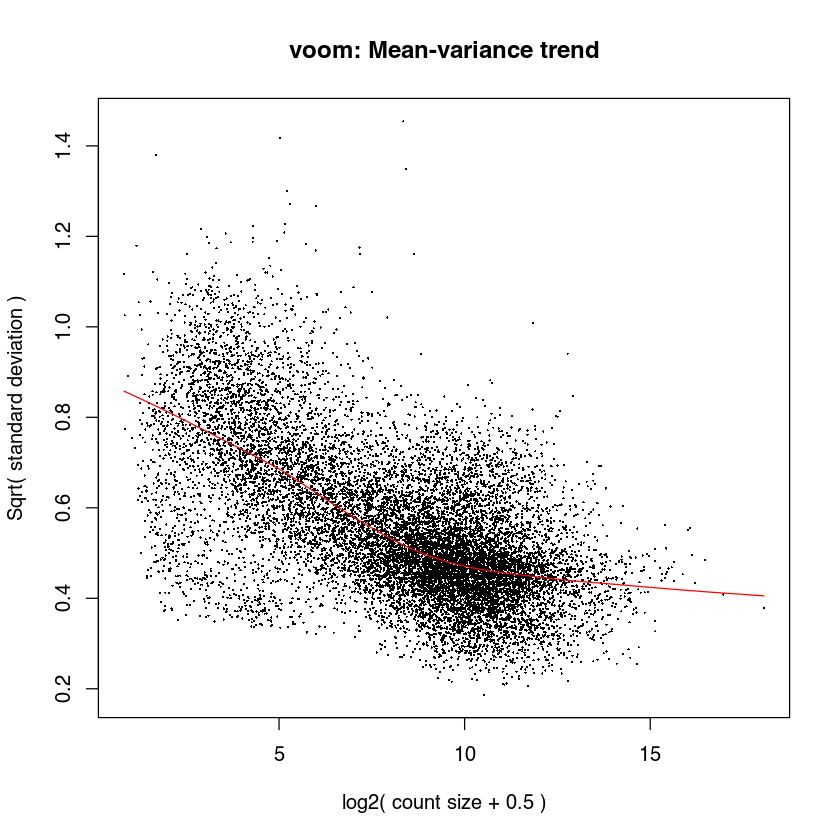

In [35]:
design <- model.matrix(~treatment + treatment:condition + condition)
par(mfrow = c(1, 1))
v <- voom(d, design, plot=TRUE)

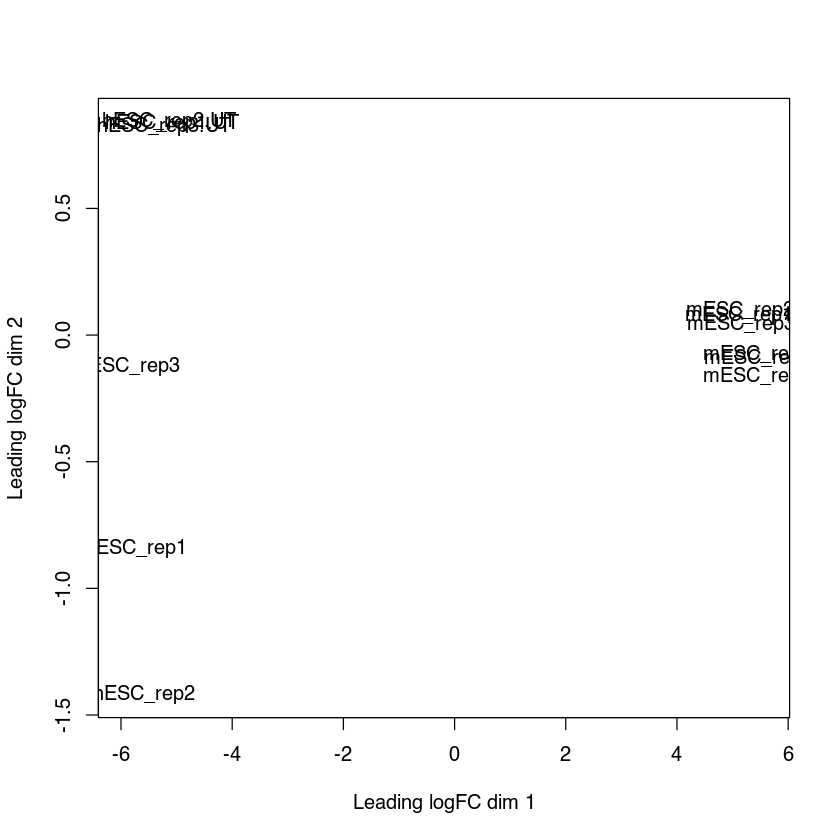

In [36]:
plotMDS(v)

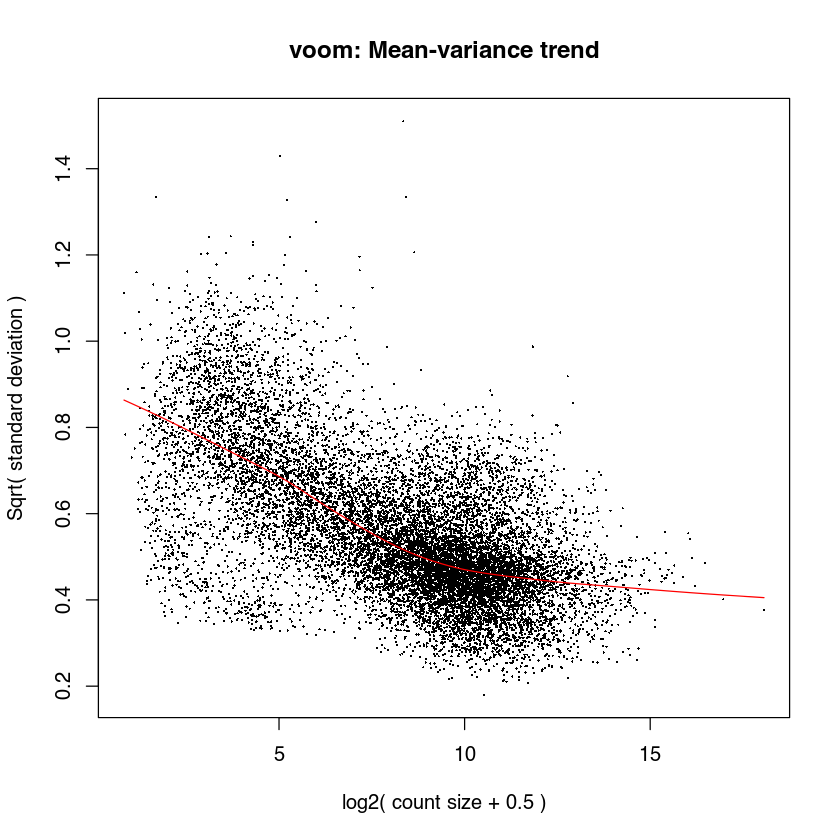

In [37]:
cor <- duplicateCorrelation(v, design, block = orth_cols_new$sample)
vobj = voom( d, design, plot=TRUE, block=orth_cols_new$sample, correlation=cor$consensus.correlation)   

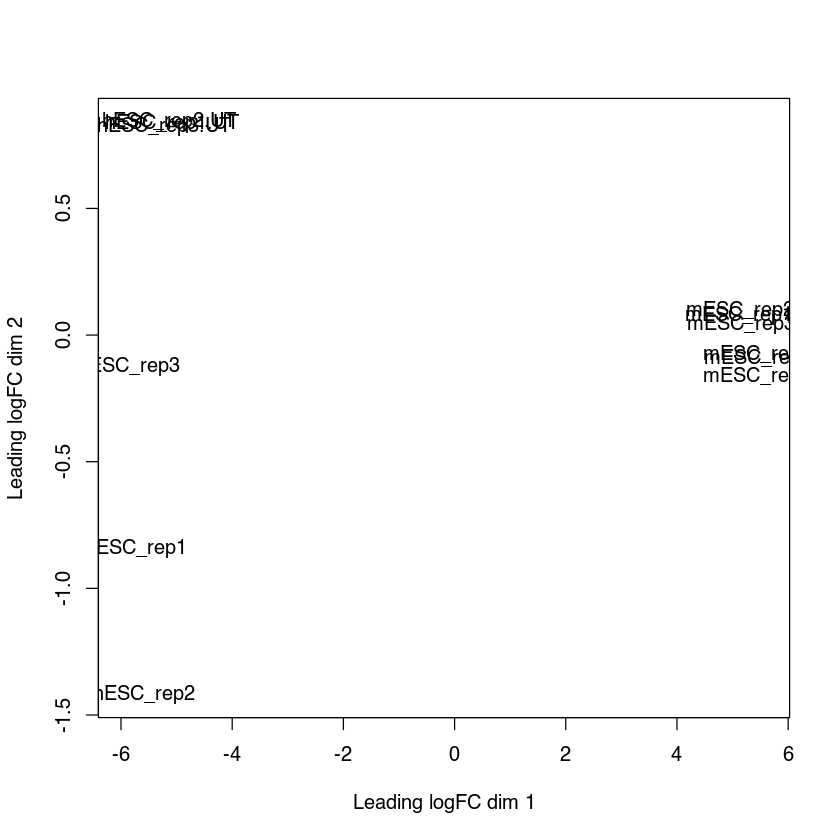

In [38]:
plotMDS(vobj)

In [39]:
fitDupCor <- lmFit(vobj, design, block=orth_cols_new$sample, correlation=cor$consensus.correlation)

In [40]:
fit <- eBayes(fitDupCor)

In [41]:
res <- decideTests(fit)
summary(res)

       (Intercept) treatmentUT conditionmESC treatmentUT:conditionmESC
Down          1415        3344          5873                        50
NotSig         742        8972          2854                     13872
Up           11911        1752          5341                       146

In [42]:
tt <- topTable(fit, coef = 2, n = Inf) 

In [43]:
DEgenes <- rownames(tt)[tt$adj.P.Val < 0.01]

In [44]:
tt <- topTable(fit, coef = "conditionmESC", n = Inf)

In [45]:
write.table(tt, file = "../../../data/03__rna_seq/03__DE/orth.voom.tt_table.with_interaction.txt", sep = "\t",
            quote = FALSE)

write.table(DEgenes, file = "../../../data/03__rna_seq/03__DE/DEgenes_treatment.voom.txt", sep = "\t",
            quote = FALSE)